<a href="https://colab.research.google.com/github/JosephKiburu/Moringa-Core/blob/main/WEEK_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [780]:
# loading our libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style()
import matplotlib.pyplot as plt
% matplotlib inline

In [781]:
# loading our dataset

df=pd.read_csv('/content/Financial Dataset - 1.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [782]:
# checking the data types for each column

df.dtypes


country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# **TIDYING OUR DATASET**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


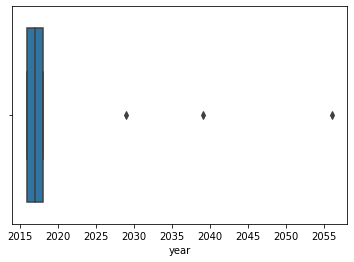

In [783]:
# checking for outliers

sns.boxplot(df['year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


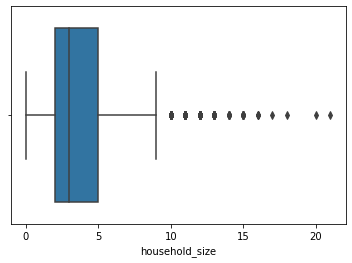

In [784]:
sns.boxplot(df['household_size'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


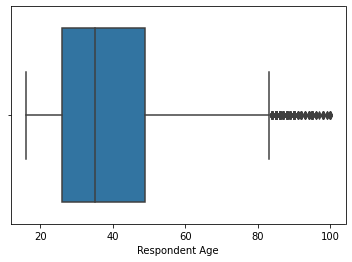

In [785]:
sns.boxplot(df['Respondent Age'])
plt.show()

In [786]:
# checking for any missing data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [787]:
# checking our datasets records

df.shape

(23524, 13)

In [788]:
# dropping the missing values

df=df.dropna()

In [789]:
# checking our records after dropping the missing values

df.shape

(23343, 13)

In [790]:
# checking for any duplicated data

df.duplicated().sum()

0

In [791]:
# fixing any typos on the column  names

df.rename(columns={'The relathip with head':'The relationship with the head','Level of Educuation':'Level of Education'}, inplace=True)

In [792]:
df.columns=df.columns.str.replace(' ','_').str.lower()

In [793]:
# checking the values in the years column

df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [794]:
# we have year 2029, 2056 and 2039 in our dataset which should not be included in our dataset
# since our data should only involve years 2016, 2017 and 2018

value_list=['2016','2017','2018']
df=df[df.year.isin(value_list)]
df['year'].unique()

array([2018, 2016, 2017])

In [795]:
# previewing the cleaned dataset

df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_the_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **UNIVARIATE ANALYSIS**

The country with the highest number of individuals with access to bank accounts

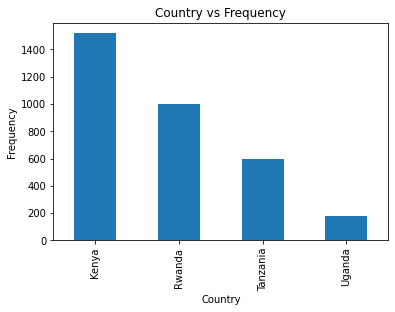

In [796]:
# creating a new table with column 'has a bank account set to ONLY Yes

df_country=df[df['has_a_bank_account']=='Yes']
df_country['country'].value_counts().plot.bar()
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Country vs Frequency')
plt.show()

The type of location with the highest number of individuals having access to bank accounts in the four countries ( Rural or Urban?)

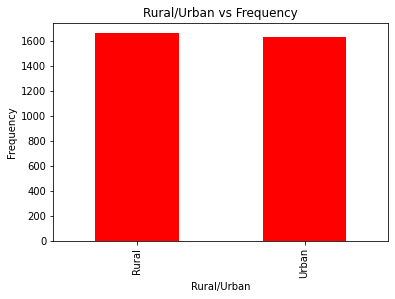

In [797]:
# set the 'has a bank account' column to Yes

Type_of_location=df[df['has_a_bank_account']=='Yes']
Type_of_location['type_of_location'].value_counts().plot.bar(color='Red')
plt.xlabel('Rural/Urban')
plt.ylabel('Frequency')
plt.title('Rural/Urban vs Frequency')
plt.show()

The country with the highest number of individuals coming from Rural areas having access to bank accounts

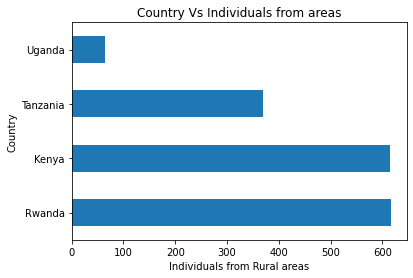

In [798]:
# set the column 'has a bank account' to yes and 'type of location' to Rural

Rural=df[(df['has_a_bank_account']=='Yes') & (df['type_of_location']=='Rural')]
Rural['country'].value_counts().plot.barh()
plt.xlabel('Individuals from Rural areas')
plt.ylabel('Country')
plt.title('Country Vs Individuals from areas')
plt.show()

The age group with the highest financial inclusion

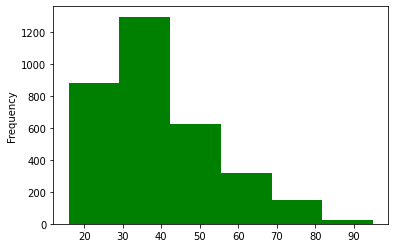

In [799]:
# set the has a bank account column to yes

age=df[df['has_a_bank_account']=='Yes']
age['respondent_age'].plot.hist(color='Green', bins=6, histtype='bar', rwidth=1)

Access to bank accounts over the years


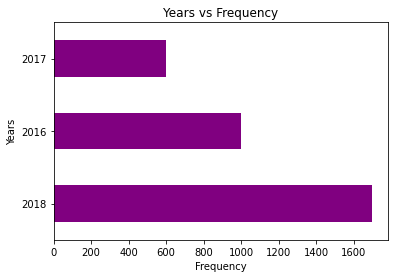

In [800]:
# set the has a bank account column to yes

years=df[df['has_a_bank_account']=='Yes']
years['year'].value_counts().plot.barh(color='Purple')
plt.xlabel('Frequency')
plt.ylabel('Years')
plt.title('Years vs Frequency')
plt.show()

Gender with the highest financial inclusion

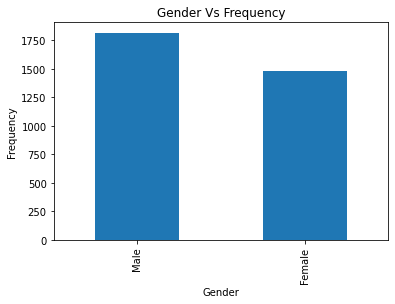

In [801]:
# set the 'has a bank account' column to Yes

Gender=df[df['has_a_bank_account']=='Yes']
Gender['gender_of_respondent'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Vs Frequency')
plt.show()

The relation between having cell phone access to financial inclusion

Text(0.5, 1.0, 'Cell Phone Access Vs Frequency')

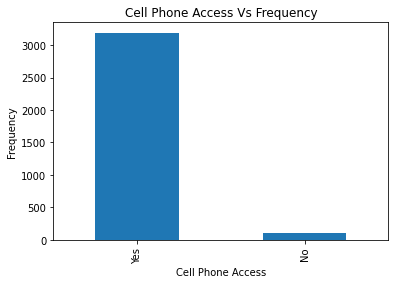

In [802]:
# set the 'has a bank account' column to Yes

cell_access=df[df['has_a_bank_account']=='Yes']
cell_access['cell_phone_access'].value_counts().plot.bar()
plt.xlabel('Cell Phone Access')
plt.ylabel('Frequency')
plt.title('Cell Phone Access Vs Frequency')

**Measures of Central Tendency**

In [803]:
# The mean age of individuals with a bank account
# first we are going to create a dataset 'age' with only individuals with bank accounts
#

age=df[df['has_a_bank_account']=='Yes']
age['respondent_age'].mean()

39.605582524271846

In [804]:
# The age that appears the most among individuals with a bank account.

age['respondent_age'].mode()

0    30.0
dtype: float64

In [805]:
# The age that divides the age dataset into two equal parts.

age['respondent_age'].median()

36.0

In [806]:
# The average size of households with individuals with NO bank accounts
# creating a dataset having only individuals with no bank accounts

household=df[df['has_a_bank_account']=='No']
household['household_size'].mean()

3.70988824585911

In [807]:
# The size household that appears the most among individuals with NO bank accounts

household['household_size'].mode()

0    2.0
dtype: float64

In [808]:
# The household that divides the household dataset into equal parts

household['household_size'].median()

3.0

**Measures of Dispersion**

In [809]:
# Finding the average distance between each age and the mean age using standard deviation

age['respondent_age'].std()

14.346347288084722

In [810]:
# Finding out how spread out the age dataset is using variance

age['respondent_age'].var()

205.81768051033583

In [811]:
# Finding the difference between the highest age and the lowest value

max_age=age['respondent_age'].max()
min_age=age['respondent_age'].min()
max_age-min_age

79.0

In [812]:
# Checking whether the age distribution is positive skewed or negative skewed

age['respondent_age'].skew()

# The distribution is positive skewed meaning the tail on the right side of the curve
# is longer than that of the left side. Also possibility of outliers present.

0.935625840226677

In [813]:
# Checking whether the data is heavy tailed or light tailed

age['respondent_age'].kurt()

# The kurtosis is closer to zero thus assuming a normal distributrion of our data.

0.4652661144893111

In [814]:
# Summary statistics of the age dataframe

age['respondent_age'].describe()

count    3296.000000
mean       39.605583
std        14.346347
min        16.000000
25%        29.000000
50%        36.000000
75%        48.000000
max        95.000000
Name: respondent_age, dtype: float64

# **BIVARIATE ANALYSIS**

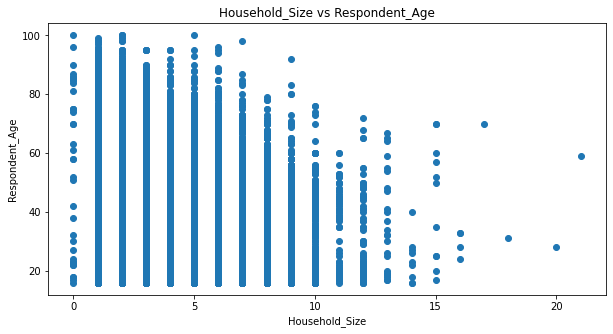

In [815]:
# Finding the relation between household size and the respondent's age

plt.figure(figsize=(10,5))
plt.scatter(df['household_size'], df['respondent_age'])
plt.xlabel('Household_Size')
plt.ylabel('Respondent_Age')
plt.title('Household_Size vs Respondent_Age')
plt.show()


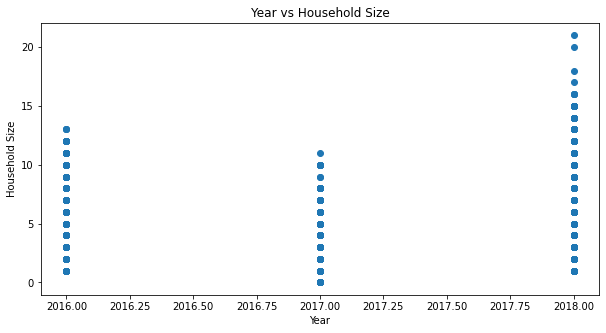

In [816]:
# Relation between year and household size

plt.figure(figsize=(10,5))
plt.scatter(df['year'], df['household_size'])
plt.xlabel('Year')
plt.ylabel('Household Size')
plt.title('Year vs Household Size')
plt.show()

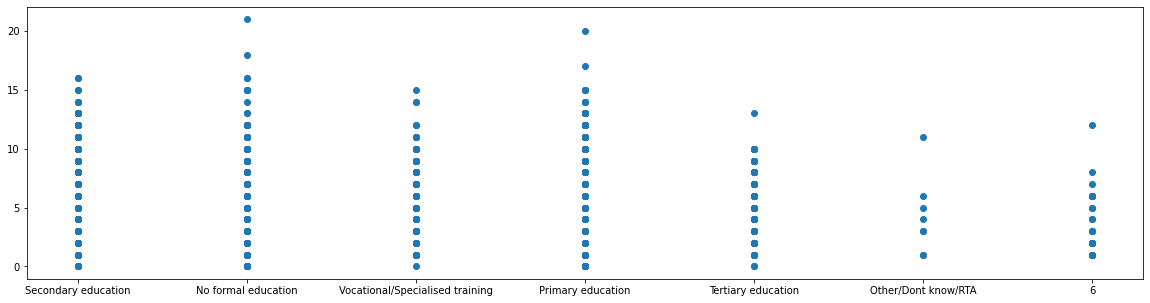

In [817]:
# Relation between an individuals level of education and his household size

plt.figure(figsize=(20,5))
plt.scatter(df['level_of_education'],df['household_size'])

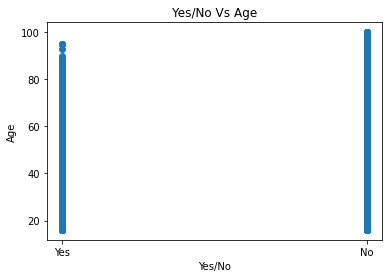

In [818]:
# Relation between whether an individual has a bank account and his age

plt.scatter(df['has_a_bank_account'], df['respondent_age'])
plt.xlabel('Yes/No')
plt.ylabel('Age')
plt.title('Yes/No Vs Age')
plt.show()

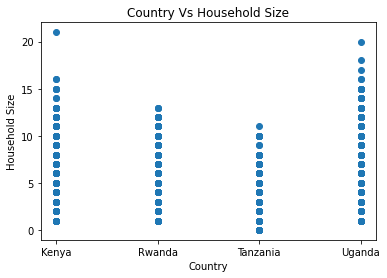

In [819]:
# Relation between an individual's country and his household size

plt.scatter(df['country'],df['household_size'])
plt.xlabel('Country')
plt.ylabel('Household Size')
plt.title('Country Vs Household Size')
plt.show()

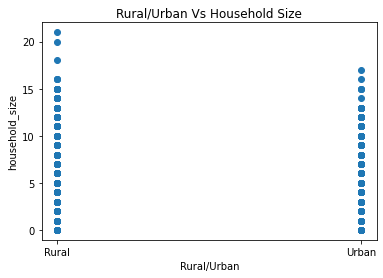

In [820]:
# Relation between the type of location and the household size

plt.scatter(df['type_of_location'],df['household_size'])
plt.xlabel('Rural/Urban')
plt.ylabel('household_size')
plt.title('Rural/Urban Vs Household Size')
plt.show()

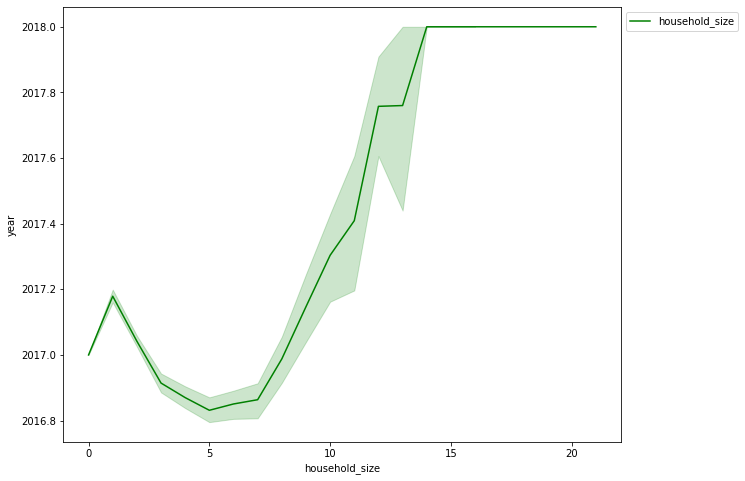

In [821]:
# Creating a line graph of household size over time

plt.figure(figsize=(10,8))

sns.lineplot(data=df, x='household_size', y='year', label='household_size', color='Green')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

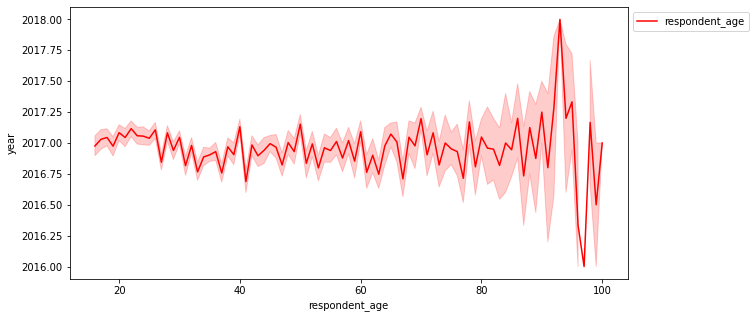

In [822]:
# Creating a line graph of age over time

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='respondent_age', y='year', label='respondent_age', color='red')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [823]:
# Calculating the pearson coefficient between year and respondent age

coefficient=df['year'].corr(df['respondent_age'], method='pearson')
coefficient

# year and the respondents' age are weakly correlated

-0.018554208106743474

In [824]:
# Calculating the pearson coefficient between year and household size

coefficient2=df['year'].corr(df['household_size'], method='pearson')
coefficient2

# year and household size are weakly correlated

-0.05248406515317324

In [825]:
# Calculating the pearson coefficient between household size and respondent age

coefficient3=df['household_size'].corr(df['respondent_age'], method='pearson')
coefficient3

# household size and respondents' age are weakly correlated

-0.1196711523415487

# **MULTIVARIATE ANALYSIS**

In [826]:
# Converting the 'has_a_bank_account' column to an integer

has_account= {'has_a_bank_account':{'No': 0, 'Yes':1}}
df.replace(has_account, inplace=True)
df.head()
df['has_a_bank_account']=df['has_a_bank_account'].astype(int)

In [827]:
df.dtypes

country                            object
year                                int64
uniqueid                           object
has_a_bank_account                  int64
type_of_location                   object
cell_phone_access                  object
household_size                    float64
respondent_age                    float64
gender_of_respondent               object
the_relationship_with_the_head     object
marital_status                     object
level_of_education                 object
type_of_job                        object
dtype: object

In [828]:
new_df=df[['country','year','has_a_bank_account','household_size','respondent_age']]
new_df.head()

,country,year,has_a_bank_account,household_size,respondent_age
0,Kenya,2018,1,3.0,24.0
1,Kenya,2018,0,5.0,70.0
2,Kenya,2018,1,5.0,26.0
3,Kenya,2018,0,5.0,34.0
4,Kenya,2018,0,8.0,26.0


In [829]:
# Preprocessing
# Dividing the dataset into a feature set and its corresponding labels
# 
X = new_df.drop('country', 1)
y = new_df['country']

In [830]:
# Splitting the dataset into the Training set and Test set
# 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [831]:
# Normalization
# Normalizing our feature set
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
new_df.dtypes

country                object
year                    int64
has_a_bank_account      int64
household_size        float64
respondent_age        float64
dtype: object

In [832]:
# Applying PCA
# Initializing the PCA class by passing the number of components to the constructor.
# Calling the fit and then transform methods by passing the feature set to these methods. 
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [833]:
# Explained Variance Ratio
# Returning the variance caused by each of the principal components. 
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.28901618, 0.27017644, 0.22888053, 0.21192685])

In [834]:
# Results with the full feature set
# Training and Making Predictions using random forest classification
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The Principal Component Analysis algorithm has an accuracy of 76.14%


[[ 871   78  265    0]
 [  26 1717   33    0]
 [  97  210  966    0]
 [ 337   18   50    0]]
Accuracy 0.7613538988860326


# **FACTOR ANALYSIS**

In [835]:
new_df.head()

,country,year,has_a_bank_account,household_size,respondent_age
0,Kenya,2018,1,3.0,24.0
1,Kenya,2018,0,5.0,70.0
2,Kenya,2018,1,5.0,26.0
3,Kenya,2018,0,5.0,34.0
4,Kenya,2018,0,8.0,26.0


In [836]:
# Dropping unnecessary columns

new_df.drop(['country', 'year', 'has_a_bank_account'], axis=1, inplace=True)
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   household_size  23340 non-null  float64
 1   respondent_age  23340 non-null  float64
dtypes: float64(2)
memory usage: 547.0 KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [837]:
# Installing factor analyzer and figuring whether we can find the factors in our dataset by
# evaluating the factorability of our dataset

!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(new_df)
chi_square_value, p_value

(336.6369632249626, 1.7279906927932794e-75)

In [838]:
# Choosing the Number of Factors

from factor_analyzer.factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(new_df,2 , rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# only 1-factor eigenvalues is greater than one. 
# It means we need to choose only 1 factor (or unobserved variables).

,Original_Eigenvalues
0,1.119671
1,0.880329


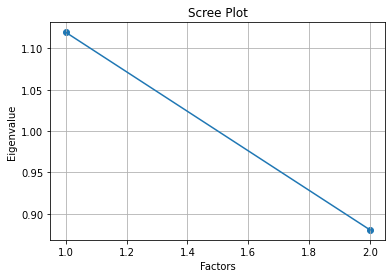

In [839]:
# Creating a scree plot using matplotlib
# It will draw only one line since there is only one factor

plt.scatter(range(1,new_df.shape[1]+1),ev)
plt.plot(range(1,new_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [840]:
# Performing Factor Analysis
#
fa = FactorAnalyzer()
fa.analyze(new_df, 1, rotation="varimax")
fa.loadings


/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:770: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


,Factor1
household_size,-0.345935
respondent_age,0.345935


In [841]:
# Getting the variance of the one factor

fa.get_factor_variance()

,Factor1
SS Loadings,0.239342
Proportion Var,0.119671
Cumulative Var,0.119671


# **DISCRIMINANT ANALYSIS**

In [842]:
# Defining our dataset

df_new=df[['country','has_a_bank_account','household_size','respondent_age']]
df_new.head()

,country,has_a_bank_account,household_size,respondent_age
0,Kenya,1,3.0,24.0
1,Kenya,0,5.0,70.0
2,Kenya,1,5.0,26.0
3,Kenya,0,5.0,34.0
4,Kenya,0,8.0,26.0


In [843]:
# Divide dataset into features and labels
#

X = df_new.iloc[:, 1:4].values
y = df_new.iloc[:, 0].values

In [844]:
# Divide the data into training and test sets
#

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [845]:
# Performing feature scaling
# 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [846]:
# Peforming Discriminant Analysis
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [847]:
# Evaluating the Performance of the algorithm
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# The Linear Discriminant Analysis algorithm has an accuracy of 76.14%

[[ 871   78  265    0]
 [  26 1717   33    0]
 [  97  210  966    0]
 [ 337   18   50    0]]
Accuracy0.7613538988860326
